# `INDEED JOB POSTING TEXT: WORD CLOUD ` 

# <font color=red>Mr Fugu Data Science</font>

# (◕‿◕✿)

# Purpose & Outcome:

+ Use the Indeed data that was webscraped and cleaned (*for the most part*) using NLP
and do some plotting

+ Then we combined all of the `225` job postings for `data scientist in California` into one string that will be used for plotting today.
    + `Word Cloud` will be used to represent our data, I will show a few examples of the core data to get an idea of what these data look like. 
    + A separate subset of our skills will be used to represent these data as a word cloud as well. 
    
+ I will mention some considerations as well when using images to embed the data.

`-------------------`

# `Next, videos`: probably some `json parsing` and I would like to do a `ML model` as a separate video.

`------------------`

In [1]:
import pickle                            # open our file
import pandas as pd                      # dataframe stuff
import os
import re

# plotting image with word cloud
from PIL import Image                    # for our images
import numpy as np                       # convert image to np arrays
from wordcloud import WordCloud,ImageColorGenerator,STOPWORDS # generate word cloud
import matplotlib.pyplot as plt          # plotting

In [2]:
# Webscraped file:
indeed_webscraped_data='Indeed_scrape_Oct2020.txt'
indeed_webscr_df=pd.read_pickle(indeed_webscraped_data)
indeed_webscr_df.head()

,job_title,company_name,location,summary,post_Date,Qualification_link,Qual_Text,skill_matches
0,"Data Scientist, Medical Diagnostics",Specific Diagnostics,"Mountain View, CA 94043",The development of data-driven visualization t...,30+ days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0ASXGwdLWjBNYivRa...,The CompanyThe world is facing a medical crisi...,"[python, sql, visualization, c+, c++, nosql, dl]"
1,Data Scientist,Laxmi Therapeutic Devices,"Goleta, CA 93117",7+ years' practical experience manipulating da...,16 days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0ALgD31io3l0I0Y-r...,Data ScientistLaxmi Therapeutic Devices – Gole...,"[python, sql, statistics, algorithms, dl]"
2,Data Scientist,Blue Owl,"San Francisco, CA","We’re using rich customer insights, advanced t...",30+ days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0D3UvD5kBSgX9r9tF...,"Our Mission\nWe’re here to create a safer, hap...","[python, machine learning, deep learning, pand..."
3,Data Engineer,"Amick Brown, LLC","Sunnyvale, CA",Develops technical tools and programming that ...,Today,/pagead/clk?mo=r&ad=-6NYlbfkN0A74pTrSPrBtiJlYH...,"Data EngineerSunnyvale, CAAmick Brown is seeki...","[python, sql, aws, machine learning, machine l..."
4,Data Scientist,Triplebyte,California,You'll report directly to Triplebytes' Head of...,22 days ago,/pagead/clk?mo=r&ad=-6NYlbfkN0AMr11YIOo206dX9C...,About Triplebyte\n\nTriplebyte is transforming...,"[aws, machine learning, machine learning, time..."


In [3]:
# This is the text we performed NLP on for each entry, here is entry 0 of 224
indeed_webscr_df['Qual_Text'][0]

'The CompanyThe world is facing a medical crisis, bacteria are increasingly evolving resistance to even our strongest antibiotics. The problem is already very real and immediate; for example, bloodstream infection leading to sepsis is now responsible for more than half of all deaths in hospitals and is the most expensive condition treated in hospitals. Sepsis mortality rate increases >6% every hour without effective antibiotic treatment. Yet, despite the life and death urgency, and healthcare cost impacts, current methodologies require 3 days to determine the correct antibiotic.Specific Diagnostics has developed a breakthrough solution to rapidly determine the effective antibiotic treatment for bloodstream and other acute infections. Used for bloodstream infection Specific’s solution provides results 2 days sooner than existing methods, saving patients suffering from drug-resistant infection.We have been funded by nearly $30 M in non-dilutive government sponsored research support and r

# `This column will be used for the second word cloud: `

+ We made this column based on a list of skills that were compared to each text entry from the `Qualification_text` 

This represents what skills match our list, as you can see <font size=6>`Python`</font> comes up quite a lot!

# <font size=8>🤪 🤖</font>

In [4]:
indeed_webscr_df['skill_matches'].head(10)

0     [python, sql, visualization, c+, c++, nosql, dl]
1            [python, sql, statistics, algorithms, dl]
2    [python, machine learning, deep learning, pand...
3    [python, sql, aws, machine learning, machine l...
4    [aws, machine learning, machine learning, time...
5    [python, sql, sas, tableau, statistics, visual...
6                    [sql, tableau, visualization, dl]
7         [python, machine learning, machine learning]
8                                     [statistics, dl]
9    [python, sql, machine learning, visualization,...
Name: skill_matches, dtype: object

# `Data after cleaning using NLP from other video:`

Here is that code link:
https://github.com/MrFuguDataScience/NLP

Also, original webscraping for these data:
https://github.com/MrFuguDataScience/Webscraping

In [5]:

cleaned_data=pd.read_pickle('indeed_cleaned_dta.pkl')
cleaned_data.head()

,Qual_Text,Qual_Text_wrdCnt,len_wo_hyperlinks,cleaned_wrd_cnt,lemma_len,lemma_wrds
0,The CompanyThe world is facing a medical crisi...,3938,3938,317,317,"[companythe, world, facing, medical, crisis, b..."
1,Data ScientistLaxmi Therapeutic Devices – Gole...,2798,2798,241,241,"[data, scientistlaxmi, therapeutic, device, go..."
2,"Our Mission\nWe’re here to create a safer, hap...",3423,3361,329,329,"[mission, create, safer, happier, mindful, fut..."
3,"Data EngineerSunnyvale, CAAmick Brown is seeki...",2505,2505,224,224,"[data, engineersunnyvale, caamick, brown, seek..."
4,About Triplebyte\n\nTriplebyte is transforming...,2772,2772,252,252,"[triplebyte, triplebyte, transforming, way, so..."


# `Convert list of lists into a large string of everything`

In [100]:
combine_all_wrds=[]
for i in cleaned_data['lemma_wrds']:
    for j in i:
#     print(type(i))
#     print(len(i))
        combine_all_wrds.append(j)

all_wrds_str=' '.join(combine_all_wrds)

# Lets get a baseline for our `word cloud` first:

+ If we are using a separate image to embed our words we have to create a `mask` this will be enabled using the `numpy array`. Your image will be represented as a matrix of zeros if considered black or `255 as white` (*typically*) for example.
    + The mask is used to create your boundary for words to be held within.

`ex.) np.array(Image.open(some_pict.png))`

+ We will then need to create a word cloud object: 
    + This will have a few useful parameters so hit `shift tab` or `tab` to view
`wc=WordCloud(your parameters you want, mask=your mask, etc)`

+ Then need to generate our word cloud:
`wc.generate(your_string_data)`

But, this won't print so use your plotting tools such as `matplotlib`
`
wc.generate(your_string_data)
plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text",fontsize=20)
plt.axis("off")
plt.show()
`

In [7]:
# mask: 

# this image is a triangle
img_mask=np.array(Image.open('Slide1.png'))
# img_mask

In [98]:
wc=WordCloud(background_color='black',max_words=1000,max_font_size=70,random_state=1,
    mask=img_mask,contour_color='red',min_font_size=8,normalize_plurals=True)

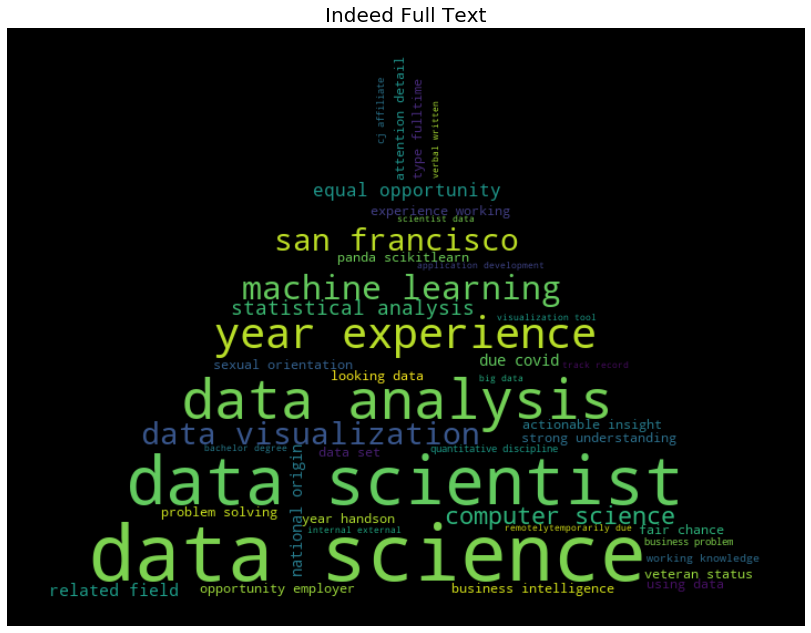

In [99]:
wc.generate(all_wrds_str)

plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text (Triangle)",fontsize=20)
plt.axis("off")
plt.show()

# `Our Skills Word Cloud:`

This is a very insightful wordcloud while extremely simple and its due to the fact that we have a clear picture of relevant skills that are common for these jobs: `Data Scientist` or similar.

+ If I were to do this again I would have used regular expressions, to take care of any instance of `sql` related words such as `mysql,nosql,psql,etc` that would have been more useful. I say this because I looked into this for these data carefully.

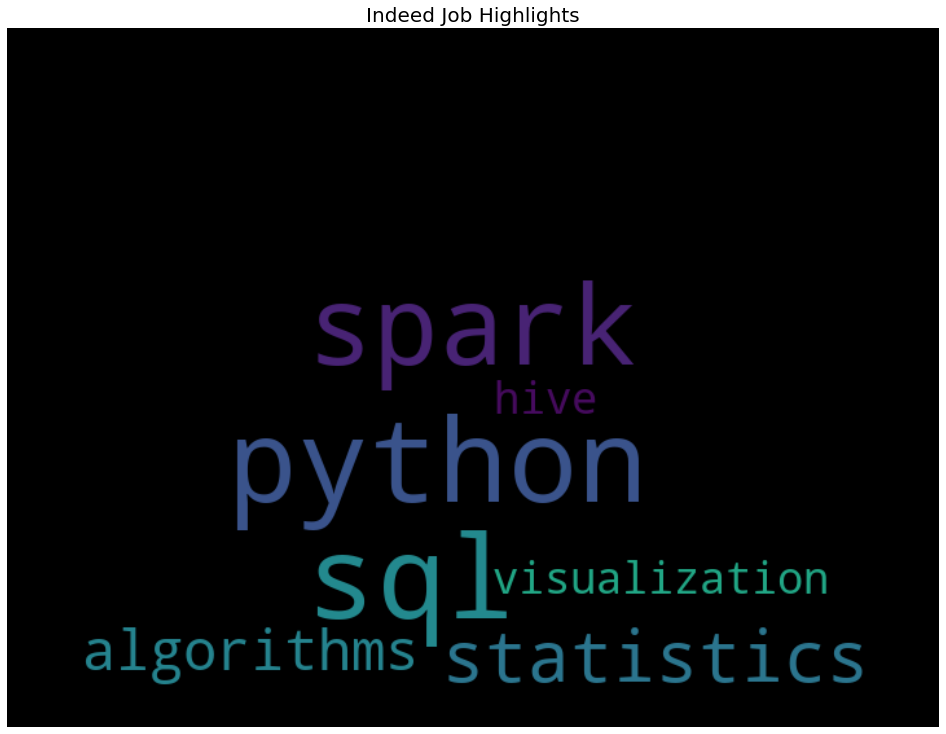

In [10]:
skills=[]
for i in indeed_webscr_df['skill_matches']:
     b_=" ".join(review for review in i)
wc=WordCloud(background_color='black',max_words=30,max_font_size=90,random_state=1,
    mask=img_mask)
wc.generate(b_)
plt.figure(figsize=(22,10))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Job Highlights",fontsize=20)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# `Ok,fine we figured that out,what next?`

+ Well we have to discard the junk that is bulking up the word cloud. That means using a new list of stopwords and work from there.

# `Remove further words:`

+ First, get word frequencies to see if there are useless words to remove

+ Second, use a list of new stopwords to remove

In [11]:
# Check out the word frequency for some more clues:
f={}
for i in cleaned_data['lemma_wrds']:
    for j in i:
#     print(i)
        if j in f:
            f[j]+=1
        else:
            f[j]=1
wrd_freq={k: v for k, v in sorted(f.items(), key=lambda item: item[1],reverse=True)}

In [12]:
# Our new list of stopwords: (just a good start) NOT a comprehensive/exhauastive list, ok.
more_wrd_to_remove=['year','experience','user','employee','type','llc','member','youll',
'various','range','position','end','service','leveljob','wide','card','bring',
'sexual orientation','sexual', 'orientation','veteran','status','employer','year experience',
'due','covid','natural origin','using','u','sexal','sexal orientation',
'sexalorientation','decovid','de covid']

In [15]:
# Remove further nonsense words:

for i in more_wrd_to_remove:
    if i in all_wrds_str:
        revised_wrd_cloud=all_wrds_str.replace(i,'')


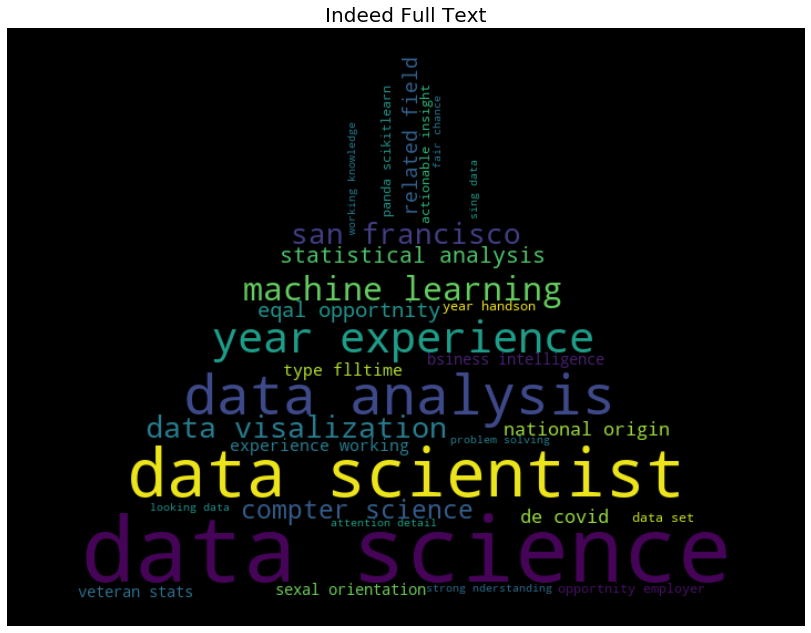

In [16]:
# Lets plot again with the new string list:

wc.generate(revised_wrd_cloud)


plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text (triangle with [remove new stopwords])",fontsize=20)
plt.axis("off")
plt.show()

# Lets Look at something else with our `word cloud`: 

+ how about using an image with multiple colors, and take advantage of 3 or more channels. Because after all you can exploit this be customizing your plot. 

You will be able to map your colors then:

with `colors=wc.recolor(color_func=ImageColorGenerator(img_mask))`

In [ ]:
# How about changing the plot from white to black by changing the pixels with numpy

In [71]:
def transform_format(val):
    for i in val:
        if np.all(i) == 0:
            return 255
        else:
            return i
    
'''
This was used to figure out why it wasn't working, basically: the nesting was an issue

for i in img_mask_cloud:
    if np.all(i[0])==0:
        print('yes')
'''


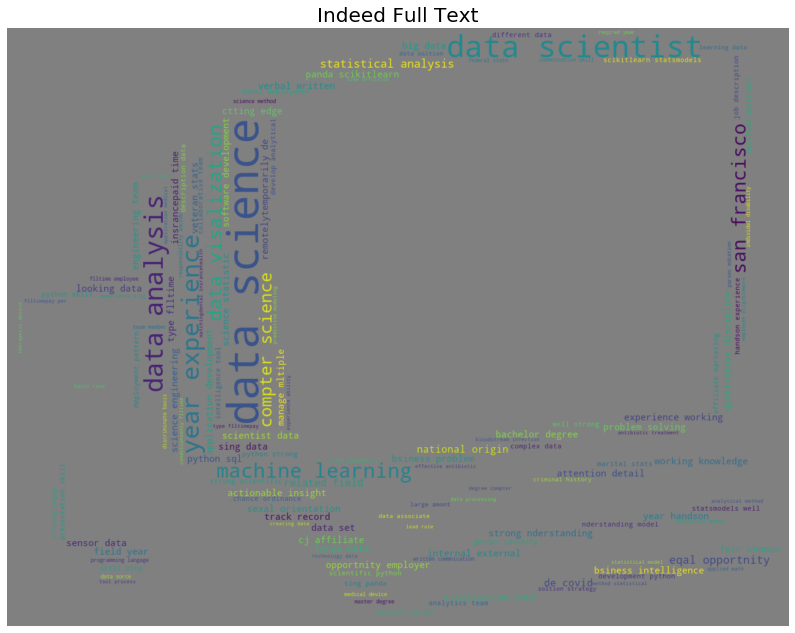

In [93]:
# computer image
img_mask_computer=np.array(Image.open('cartoon_computer.png'))

# If you are calling from anywhere other than CWD than consider something like this:
# img_mask= np.array(Image.open(os.path.join(os.getcwd(),'cartoon_computer.png')))

# transform the matrix
trans_computer_mask = np.ndarray((img_mask_computer.shape[0],
img_mask_computer.shape[1]), np.int32)

for i in range(len(img_mask_computer)):
    trans_computer_mask[i]=list(map(transform_format, img_mask_computer[i]))

wc=WordCloud(background_color='white',max_words=850,max_font_size=70,random_state=1,
mask=trans_computer_mask,min_font_size=8,normalize_plurals=True)

wc.generate(revised_wrd_cloud)


plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text (computer image with transform [removed new stopwords])",
          fontsize=20)
plt.axis("off")
plt.show()

# `multicolor plot now: (computer image from above) redone`

+ It worked but, sure doesn't look good in this scenario

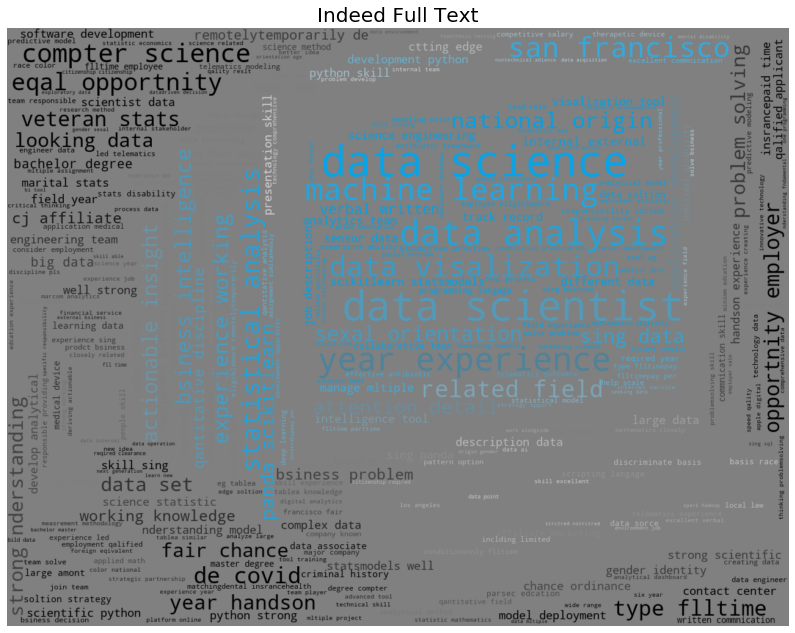

In [97]:
img_mask_computer=np.array(Image.open('cartoon_computer.png'))

wc=WordCloud(background_color='grey',max_words=850,max_font_size=70,random_state=1,
mask=img_mask_computer,min_font_size=8,normalize_plurals=True)
wc.generate(revised_wrd_cloud)

colors=wc.recolor(color_func=ImageColorGenerator(img_mask_computer))
plt.figure(figsize=(22,11))
plt.imshow(colors, interpolation="bilinear")
# plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text (computer image with color mapping [removed new stopwords])",
          fontsize=20)
plt.axis("off")
plt.show()


# Plotting a cloud that is only a black border and not filled

+ notice the problem

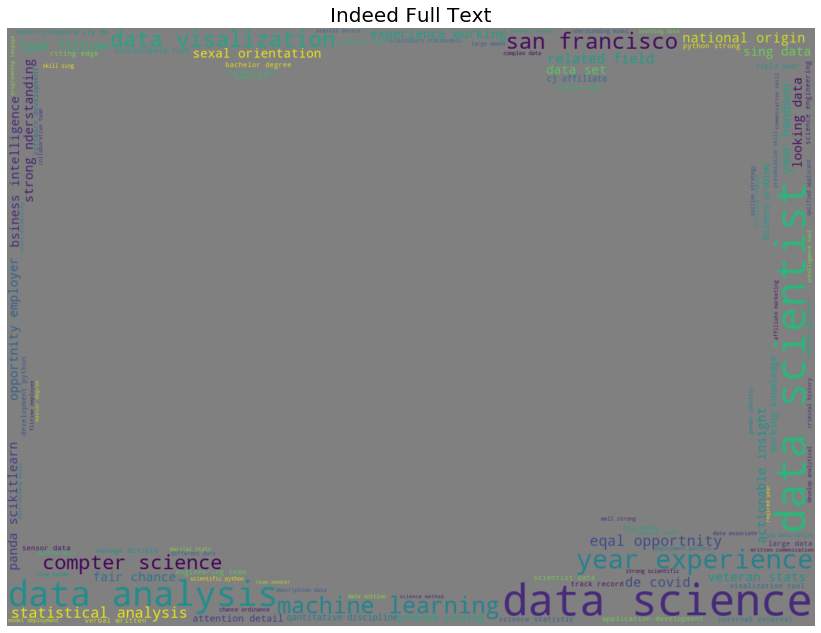

In [75]:

img_mask_cloud=np.array(Image.open('cloud_img.png'))
wc=WordCloud(background_color='grey',max_words=850,max_font_size=70,random_state=1,
mask=img_mask_cloud,min_font_size=8,normalize_plurals=True)
wc.generate(revised_wrd_cloud)


plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text (cloud outline with [removed new stopwords])",fontsize=20)
plt.axis("off")
plt.show()


# `Sometimes your work doesn't workout: `

for instance this occurs when you have a white image with a border of your object seen below. Unfortunately, this image is not a candidate from my knowledge to use a transform. I tried but... It returns an empty file if I tried:

`whitecloud__mask=np.array(Image.open('cloud_img.png'))
whtcld_mask = np.ndarray((whitecloud_mask.shape[0],
whitecloud_mask.shape[1]), np.int32)
for i in range(len(whitecloud_mask)):
   whtcld_mask[i]=list(map(transform_format, whitecloud_mask[i]))
img_mask_cloud=np.array(Image.open('cloud_img.png'))
wc=WordCloud(background_color='grey',max_words=850,max_font_size=70,random_state=1,
mask=whtcld_mask,min_font_size=8,normalize_plurals=True)
wc.generate(revised_wrd_cloud)
plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text",fontsize=20)
plt.axis("off")
plt.show()`

# `Transforming the background: otherwise the word mapping doesn't fit into the clouds`

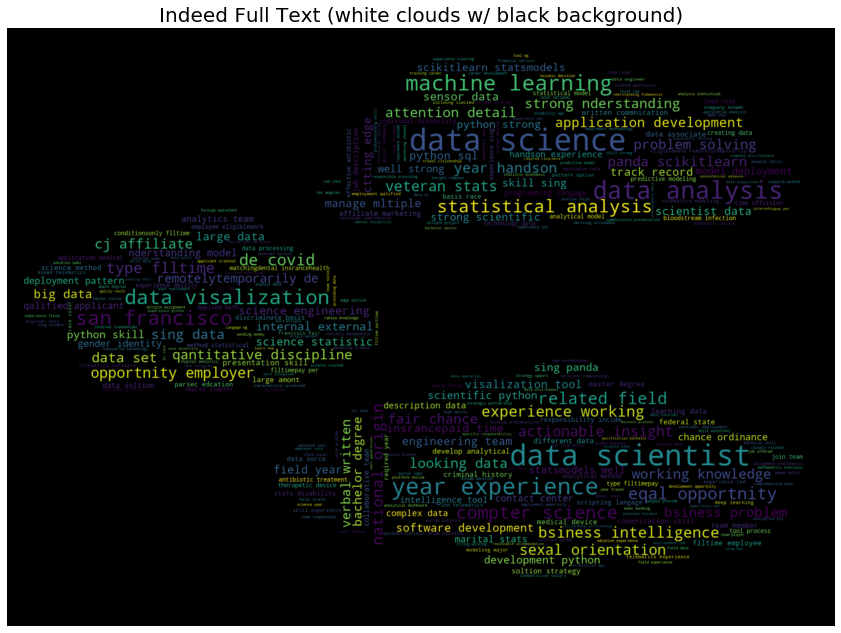

In [89]:
# white clouds with black background:
whitecloud_blkbckgrnd_mask=np.array(Image.open('cartoon_blk_cloud.jpg'))
trans_whtcld_blkgrd_mask = np.ndarray((whitecloud_blkbckgrnd_mask.shape[0],
whitecloud_blkbckgrnd_mask.shape[1]), np.int32)

for i in range(len(whitecloud_blkbckgrnd_mask)):
    trans_whtcld_blkgrd_mask[i]=list(map(transform_format, whitecloud_blkbckgrnd_mask[i]))

wc=WordCloud(background_color='black',max_words=850,max_font_size=70,random_state=1,
mask=trans_whtcld_blkgrd_mask,min_font_size=8,normalize_plurals=True,contour_color='red')
wc.generate(revised_wrd_cloud)


plt.figure(figsize=(22,11))
plt.imshow(wc,interpolation="bilinear")
plt.title("Indeed Full Text (white clouds w/ black background with [removed new stopwords])",
          fontsize=20)
plt.axis("off")
plt.show()

# Finishing thoughts:

+ If I were to do this again, I would increase the list for skills

+ Fine tune the word clouds

+ Increase amount of data when I orginally webscraped. I mean 225 jobs is a good sample to get an idea. Especially for the tech sector in California. But, what would be interesting is evaluating geographical differences in skills by state or even country.

Overall, the word cloud can give you some insight but, the coherence and cogent nature  of this can be looked should be evaluated from a distance.

# <font color=red>LIKE</font>, Share &

# <font color=red>SUB</font>scribe

`-------------------------`

# Citations & Help:

# ◔̯◔

https://www.datacamp.com/community/tutorials/wordcloud-python

https://www.youtube.com/watch?v=k-gin1qfzi0

https://www.youtube.com/watch?v=eHxWshJpoRk&t=1048s

https://pixabay.com/vectors/cartoon-computer-tooned-in-2026805/

https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

https://mubaris.com/posts/dataviz-wordcloud/